In [14]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [9]:
torch.__version__

'2.4.0+cu121'

In [15]:
torchvision.__version__

'0.19.0+cu121'

`Getting a dataset`

In [17]:
train_dataset = datasets.FashionMNIST(
    root="data", ## where to
    train=True, ## do we want the training datset
    download=True, ## do we want to download it
    transform=ToTensor(), ## transform them to tensors
    target_transform=None ## transform the labels
)

test_dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:05<00:00, 4955888.45it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200912.88it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3709622.25it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9080015.56it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [18]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [19]:
image, label = train_dataset[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [37]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
          0.0000, 0.2588, 0.0510, 0.0000, 0.0039, 0.0039, 0.0039, 0.0000,
          0.0039, 0.0000, 0.0941, 0.2078, 0.0000, 0.0157, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157,
          0.0000, 0.3059, 0.1725, 0.0000, 0.0078, 0.0000, 0.0000, 0.0000,
          0.0039, 0.0000, 0.1765, 0.1922, 0.0000, 0.0157, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
          0.0000, 0.0863, 0.3569, 0.0000, 0.0157, 0.0000, 0.0039, 0.0000,
          0.0078, 0.0000, 0.3137, 0.0706, 0.0000, 0.0078, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078,
          0.0000, 0.0157, 0.6000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000,
          0.0000, 0.0000, 0.4784, 0.0000, 0.0000, 0.0039,

In [20]:
label

9

In [21]:
class_names = train_dataset.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [22]:
class_to_idx = train_dataset.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [23]:
train_dataset.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [24]:
label

9

(-0.5, 27.5, 27.5, -0.5)

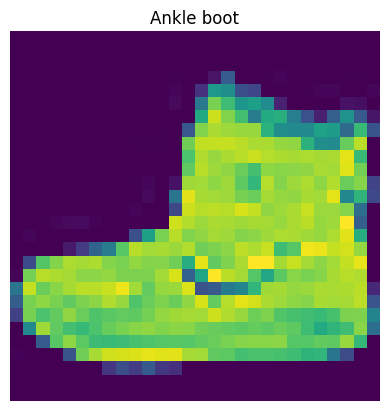

In [28]:
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

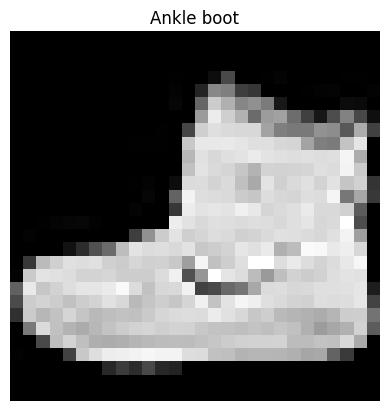

In [34]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis("off")

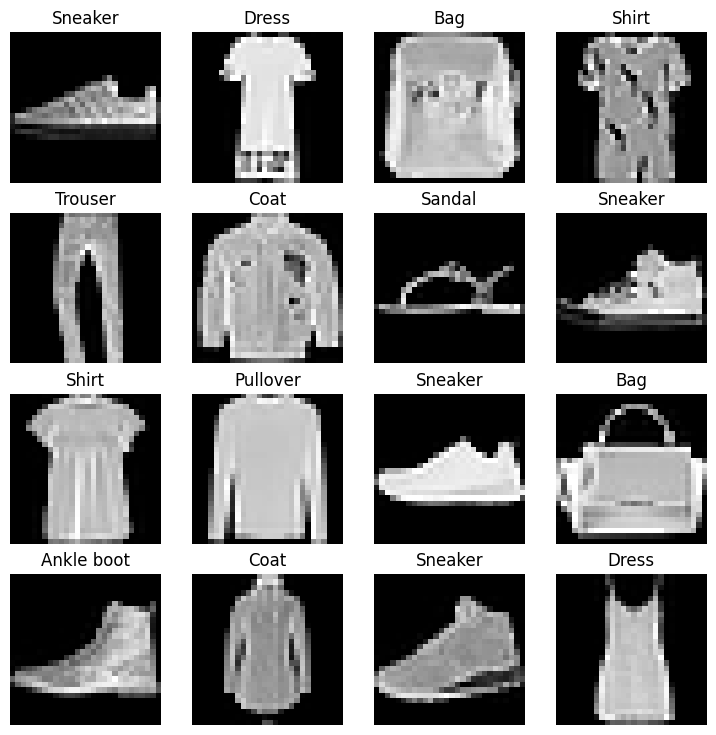

In [36]:
## plot random images
#torch.manual_seed(23)

fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_dataset),size=[1]).item()
    image, label = train_dataset[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis("off")

In [39]:
train_dataset, test_dataset

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### `Prepare a DataLoader: turn our dataset into a Python iterable(hardware-friendly)`
- Computationally more efficient

In [40]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=32,
    shuffle=False
)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x788717c74400>,
 <torch.utils.data.dataloader.DataLoader at 0x788717c75900>)

In [41]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of 32")
print(f"Length of test dataloader: {len(test_dataloader)} batches of 32")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x788717c74400>, <torch.utils.data.dataloader.DataLoader object at 0x788717c75900>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [42]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

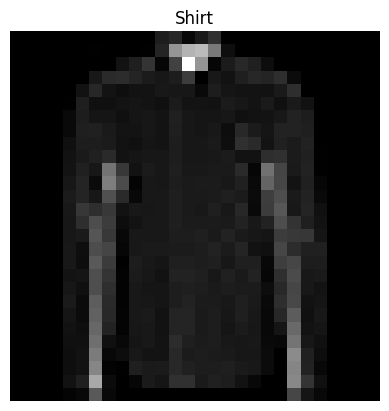

In [44]:
torch.manual_seed(87)
randomidx = torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[randomidx], train_labels_batch[randomidx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis("off");

`Computer Vision Model`
- Baseline Model

In [48]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape  ## torch.Size([1, 28, 28]) -> color channels, height, width

output = flatten_model(x) ## perform forward pass
output.shape  ## -> color channels, height*width

torch.Size([1, 784])

In [50]:
output[:10]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0000, 0.0000, 0.2471, 0.4549,
         0.3294, 0.1569, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.1490, 0.1216, 0.0

In [51]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape,
                out_features=hidden_units),
      nn.Linear(in_features=hidden_units,
                out_features=output_shape)
    )

    def forward(self, x):
      return self.layer_stack(x)

In [54]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to("cpu")
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [55]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.